<a href="https://colab.research.google.com/github/aashayk7/TheSparksFoundation/blob/main/GRIPIRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**
**GRIP** 

**Task**: From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

Link to dataset:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

Submitted by: Aashay Kulkarni

In [ ]:
#importing the preliminary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#reading the data and removing the index column
data=pd.read_csv("Iris.csv").iloc[:,1:]

In [ ]:
#handling categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
encodedlabels=labelencoder.fit_transform(data.iloc[:,-1])
data.iloc[:,-1]=encodedlabels

[780.8244, 179.12221033868093, 87.31002785114046, 66.9079888888889, 50.44367077077077, 42.97673918617615, 35.372120184565844, 31.111985967333794, 29.17324943273313]


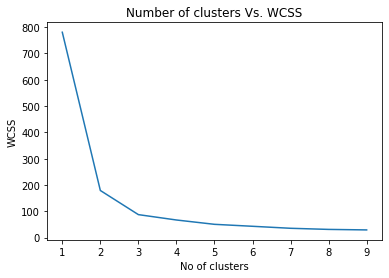

In [ ]:
#creating model
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  model=KMeans(n_clusters=i,init="k-means++",random_state=0)
  model.fit(data)
  wcss.append(model.inertia_)
print(wcss)

plt.plot(range(1,10),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("Number of clusters Vs. WCSS")
plt.show()

In [ ]:
#creating the final model
model=KMeans(n_clusters=3,init="k-means++",random_state=0)
predictions=model.fit_predict(data)


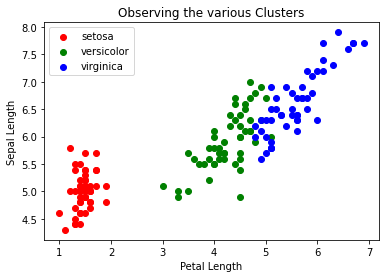

In [ ]:
#visualising the Clusters
plt.scatter(data[predictions==0].loc[:,"PetalLengthCm"],data[predictions==0].loc[:,"SepalLengthCm"],c="red",label="setosa")
plt.scatter(data[predictions==1].loc[:,"PetalLengthCm"],data[predictions==1].loc[:,"SepalLengthCm"],c="green",label="versicolor")
plt.scatter(data[predictions==2].loc[:,"PetalLengthCm"],data[predictions==2].loc[:,"SepalLengthCm"],c="blue",label="virginica")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.title("Observing the various Clusters")
plt.legend()
plt.show()